In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import matplotlib.pyplot as plt # graphics
import seaborn as sns # graphics too
import datetime as dt # for date type analysis 
import plotly.graph_objects as go # graphics
import nbformat # jupyter notebook schema
import calendar # handle dates

In [3]:
data = pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding='unicode_escape')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df = df.dropna()
df = df[~((df['Quantity'] < 0) | (df['UnitPrice']<=0))]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst = False)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] 
df['Quarter'] = pd.PeriodIndex(df['InvoiceDate'], freq = 'Q')
df['Quarter'] = df['Quarter'].astype('string')
df['Month'] = df['InvoiceDate'].dt.month
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Quarter,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010Q4,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010Q4,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011Q4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011Q4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011Q4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011Q4,12


<Axes: xlabel='Country'>

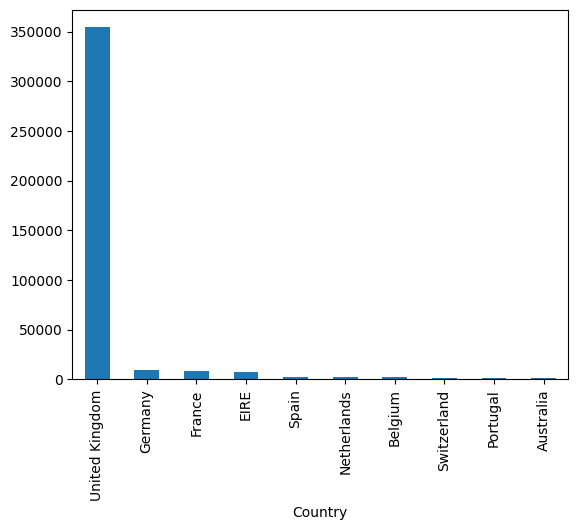

In [13]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

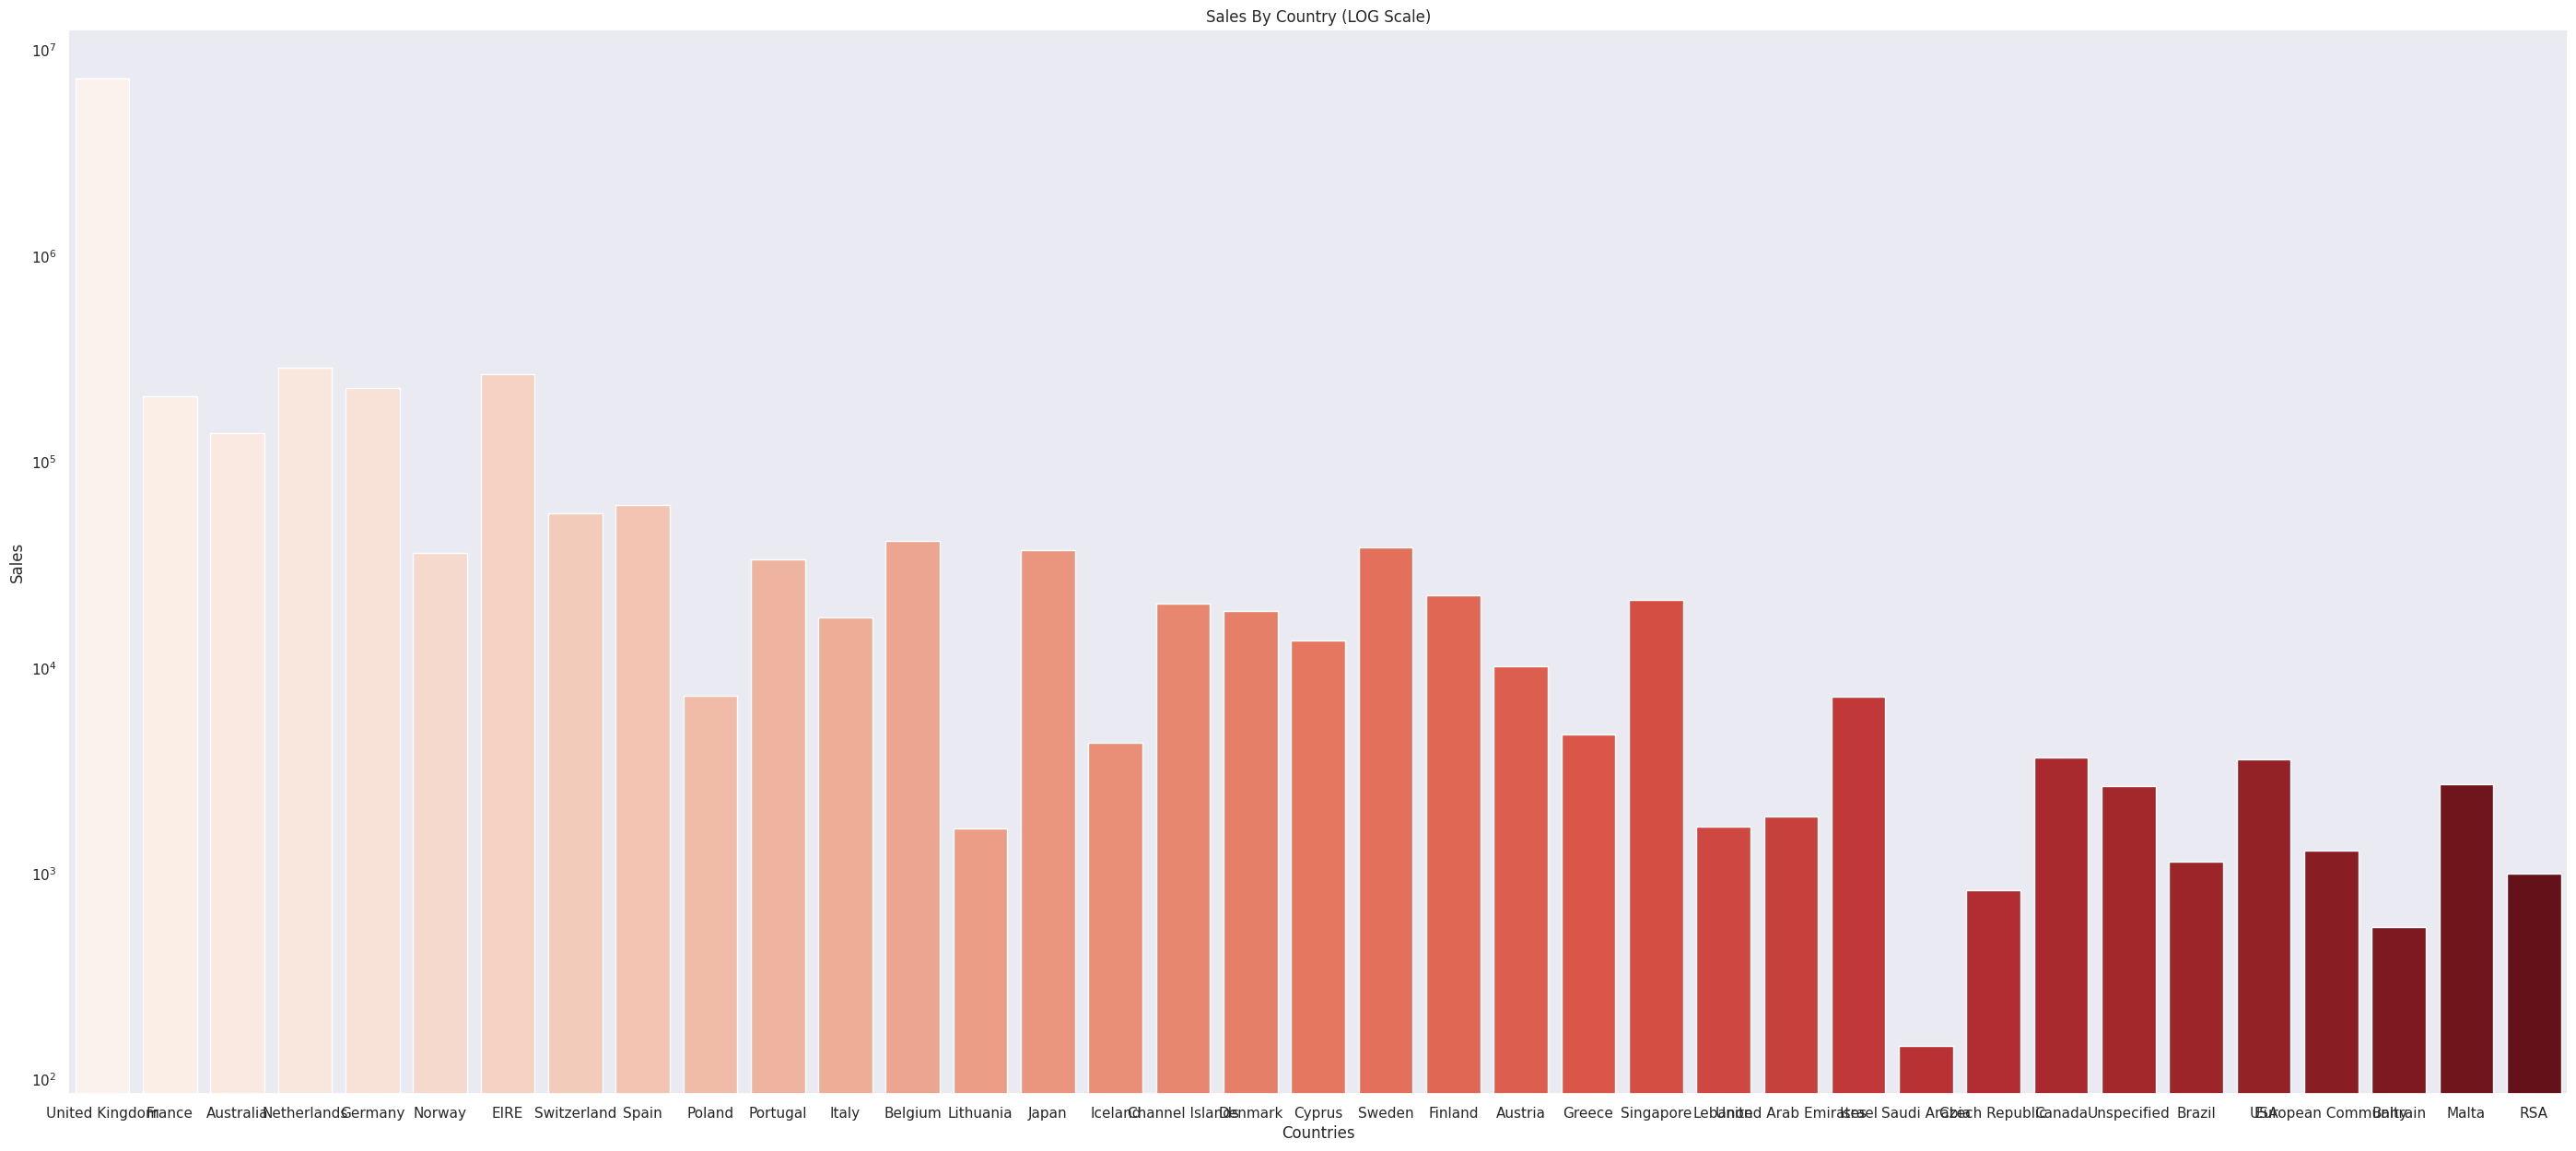

In [14]:
countries = df['Country'].unique()
row_val = []
# countries.remove('United Kingdom')
for c in countries:
    row_val.append(df[df['Country']==c]['Sales'].sum())
    
    
sns.set(style="dark") 
plt.figure(figsize=(35,15)) 
plt.yscale('log')
sns.barplot(x=countries, y=row_val, palette="Reds")

# Customize the plot
plt.xlabel("Countries")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.title("Sales By Country (LOG Scale)")  # Title of the plot (optional)

# Show the plot
plt.show()

In [15]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head(10).index.to_list()

In [16]:
df.groupby('Country')['Sales'].mean().sort_values(ascending=False).head(10)

Country
Netherlands    121.003111
Australia      117.192310
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Denmark         49.882474
Lithuania       47.458857
Lebanon         37.641778
EIRE            36.697886
Brazil          35.737500
Name: Sales, dtype: float64

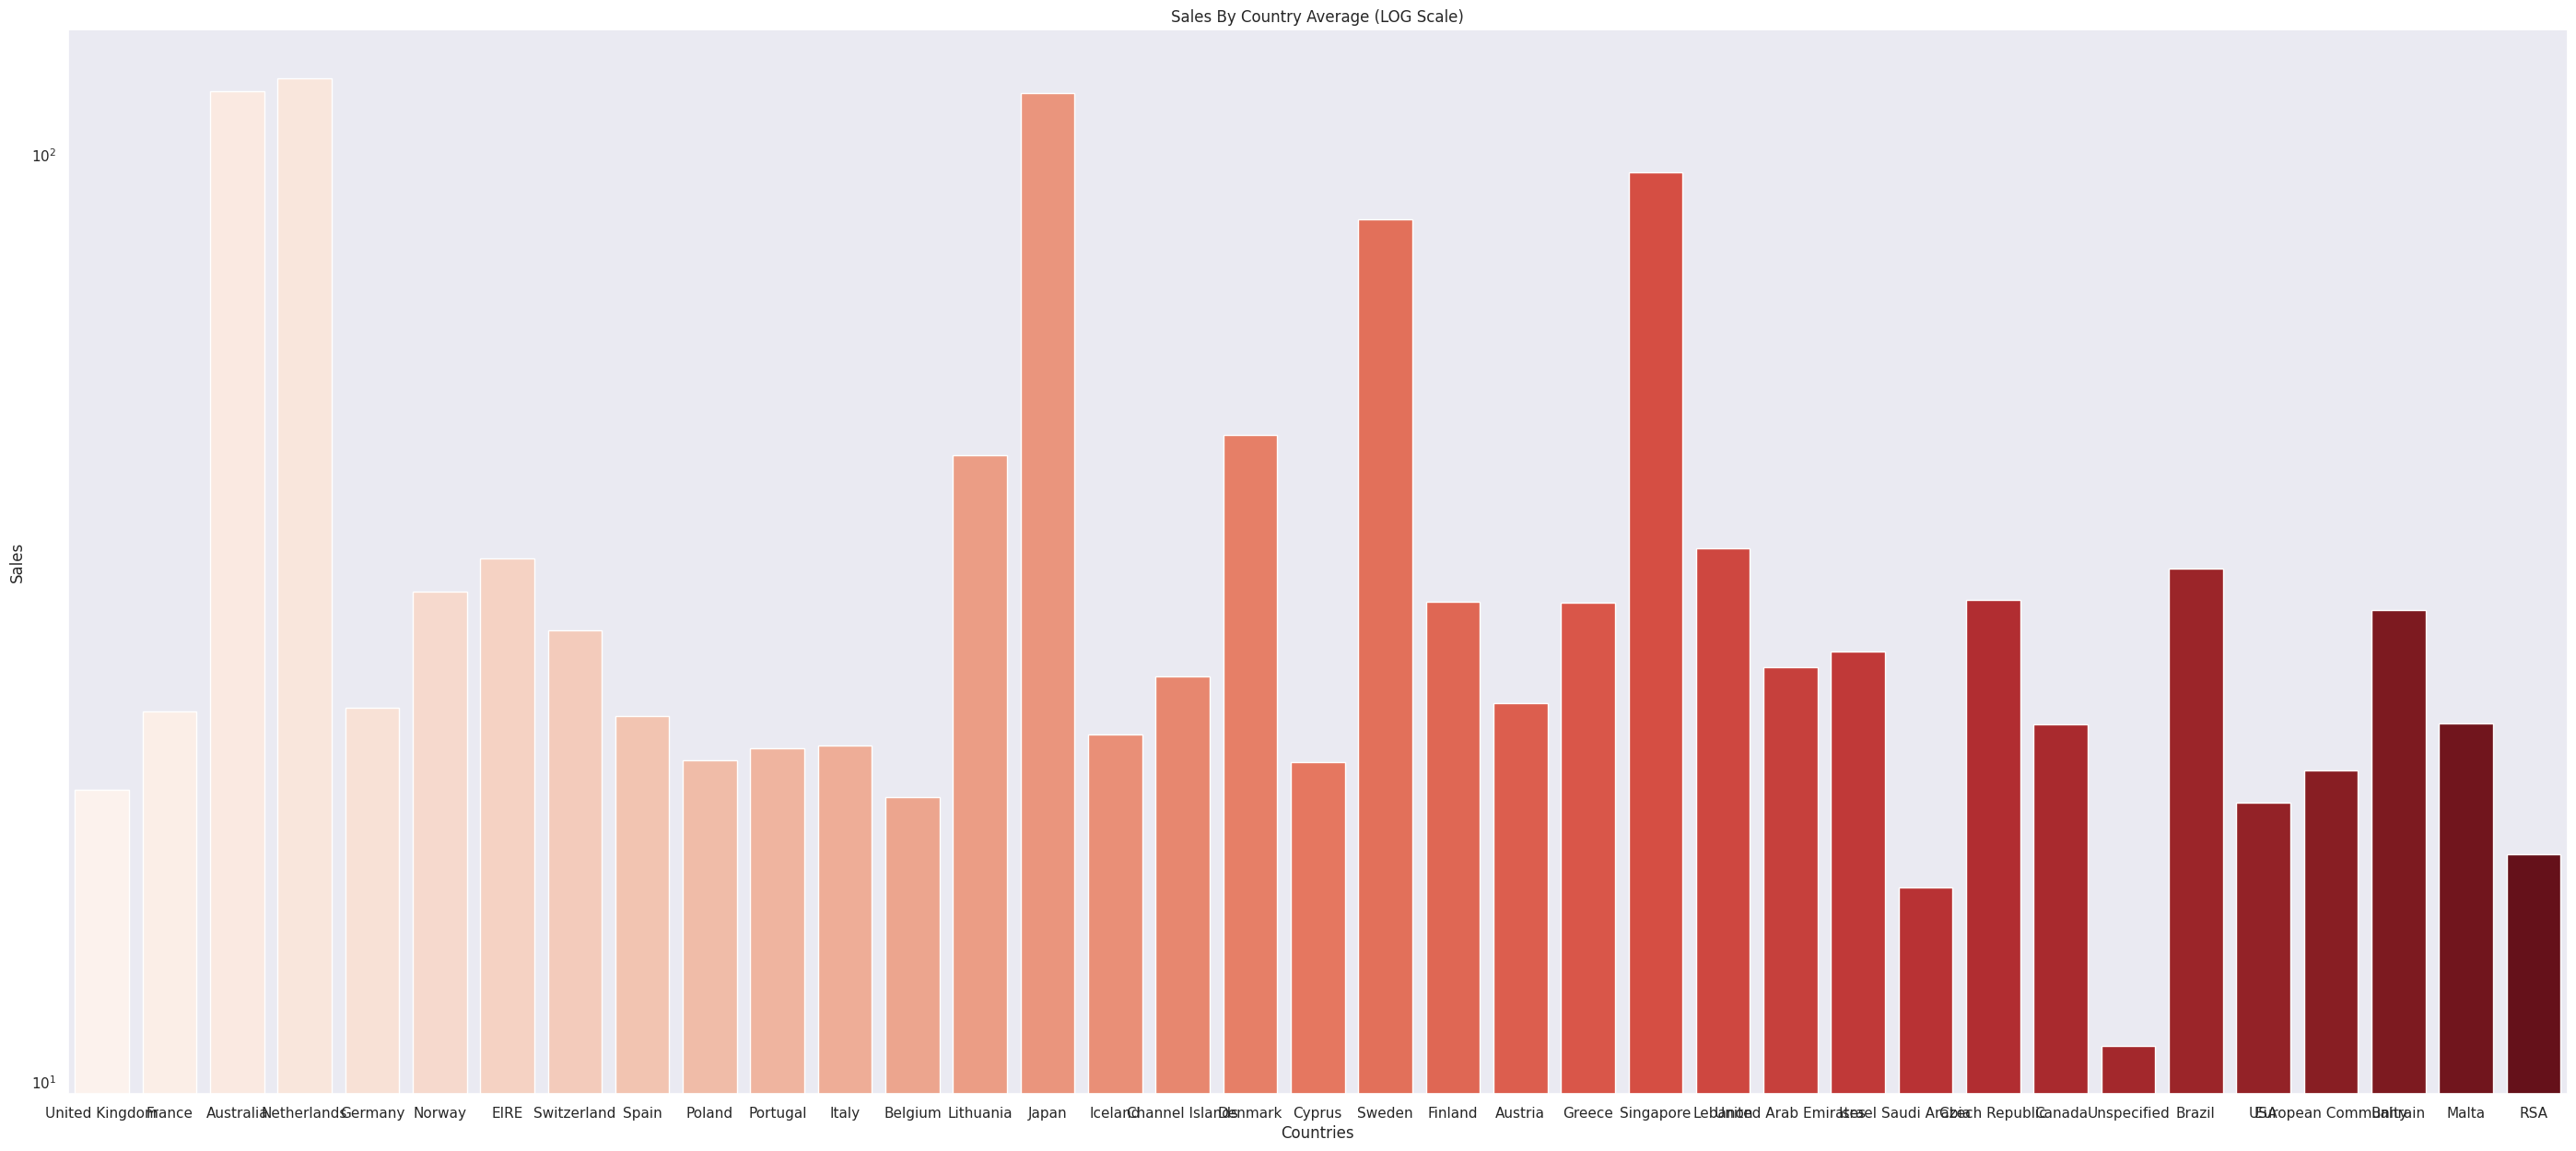

In [17]:
avg_unitcost_countries = []
for c in countries:
    avg_unitcost_countries.append(df[df['Country']==c]['Sales'].mean())
sns.set(style="dark") 
plt.figure(figsize=(35,15)) 
plt.yscale('log')
sns.barplot(x=countries, y=avg_unitcost_countries, palette="Reds")

# Customize the plot
plt.xlabel("Countries")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.title("Sales By Country Average (LOG Scale)")  # Title of the plot (optional)

# Show the plot
plt.show()

In [18]:
df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(10)

Country
Singapore             58.333288
Canada                 6.030331
Portugal               5.925472
Cyprus                 5.710391
Lebanon                5.387556
Finland                5.296993
Norway                 5.287087
Malta                  4.867768
European Community     4.830000
Italy                  4.717955
Name: UnitPrice, dtype: float64

In [19]:
df[df['Country'] == 'Singapore'].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales,Month
count,222.000000,222,222.000000,222.0,222.000000,222.000000
mean,23.608108,2011-05-22 10:15:23.513513728,58.333288,12744.0,95.852658,5.175676
min,1.000000,2011-01-25 13:26:00,0.190000,12744.0,2.340000,1.000000
25%,8.500000,2011-02-11 19:20:15,1.250000,12744.0,17.700000,1.750000
50%,12.000000,2011-04-05 10:58:00,2.100000,12744.0,36.750000,4.000000
75%,24.000000,2011-07-18 11:55:00,4.150000,12744.0,60.000000,7.000000
max,288.000000,2011-10-19 11:18:00,3949.320000,12744.0,3949.320000,10.000000
std,27.846940,NaN,373.926856,0.0,369.856236,3.079746


In [20]:
df[df['Country'] == 'Singapore']['UnitPrice'].quantile(0.95)
#outliers exist

10.827499999999972

In [21]:
df[df['Country'] == 'Singapore'].groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False).head(10)

StockCode
M        1736.985714
22655     125.000000
22929      65.000000
23020      11.150000
22423      10.950000
22760      10.950000
21621       8.500000
22193       8.500000
23543       8.250000
22192       8.075000
Name: UnitPrice, dtype: float64

In [22]:
df[(df['Country'] == 'Singapore') & (df['StockCode'] == 'M')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Quarter,Month
144825,548813,M,Manual,1,2011-04-04 13:03:00,162.60,12744.0,Singapore,162.60,2011Q2,4
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92,2011Q2,4
144827,548813,M,Manual,1,2011-04-04 13:03:00,239.30,12744.0,Singapore,239.30,2011Q2,4
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,1252.95,2011Q2,4
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07,2011Q2,4
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,3949.32,2011Q4,10
406407,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore,2118.74,2011Q4,10


In [23]:
#unit prices differ by countries from same stock code 'M'
df[df['StockCode'].isin(df[(df['Country'] == 'Singapore') & (df['UnitPrice'] > 10.82)]['StockCode'].values) & (df['Country'] != 'Singapore') & (df['StockCode'] == 'M')].groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(15)

Country
France             1895.474000
EIRE               1687.170000
Portugal            603.241429
Cyprus              320.690000
Channel Islands     293.000000
Germany             287.031250
Norway              280.100000
Finland             275.600000
United Kingdom       66.506734
Sweden               30.000000
Name: UnitPrice, dtype: float64

In [24]:
# Number of Product Sold
df['StockCode'].nunique()

3665

In [25]:
# Top 50 Products
top_stock = df['StockCode'].value_counts().head(50).index.to_list()
top_stock

['85123A',
 '22423',
 '85099B',
 '84879',
 '47566',
 '20725',
 '22720',
 '20727',
 'POST',
 '23203',
 '22383',
 '21212',
 '22197',
 '23209',
 '23298',
 '22086',
 '22382',
 '20728',
 '22469',
 '22457',
 '22384',
 '21034',
 '22727',
 '23206',
 '22993',
 '22386',
 '22960',
 '82482',
 '22961',
 '22138',
 '22666',
 '23084',
 '20726',
 '22139',
 '22178',
 '82494L',
 '22470',
 '22726',
 '22411',
 '22699',
 '20914',
 '21931',
 '23202',
 '23301',
 '23201',
 '21080',
 '20724',
 '22077',
 '23355',
 '21790']

In [26]:
df['InvoiceDate'].describe()

count                           397884
mean     2011-07-10 23:41:23.511023360
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 14:39:00
75%                2011-10-20 14:33:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

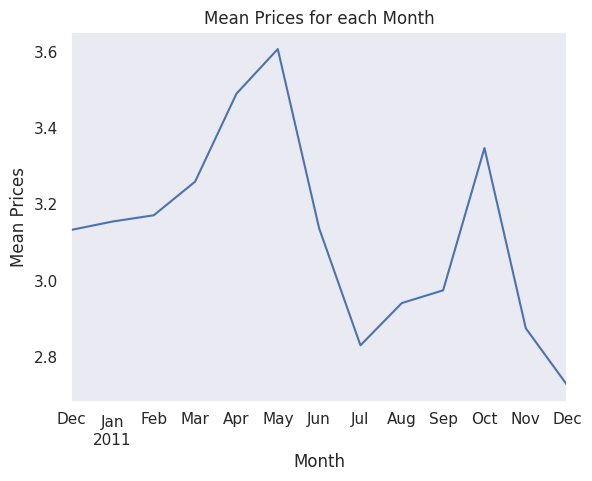

In [27]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['UnitPrice'].mean().plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Month');

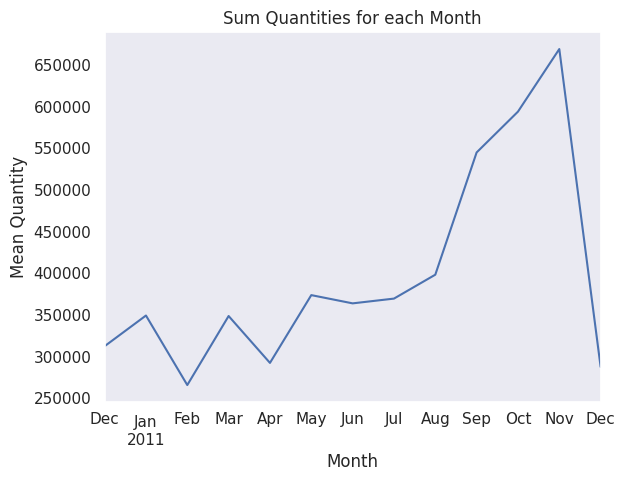

In [28]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Quantity'].sum().plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Quantity')
plt.title('Sum Quantities for each Month');

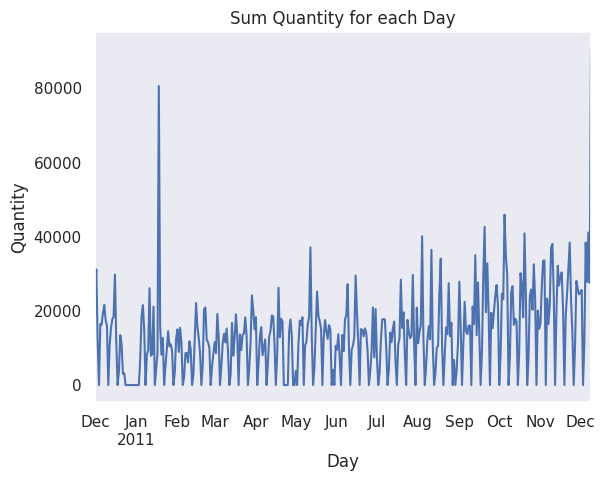

In [29]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='d')).sum()['Quantity'].plot(stacked=True)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Sum Quantity for each Day');

In [30]:
df['DayOfMonth'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

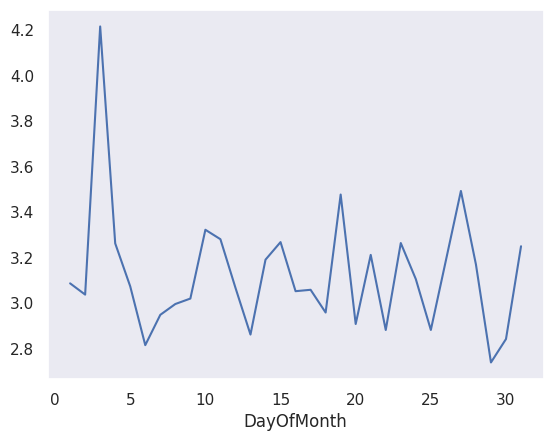

In [31]:
df.groupby('DayOfMonth')['UnitPrice'].mean().plot();

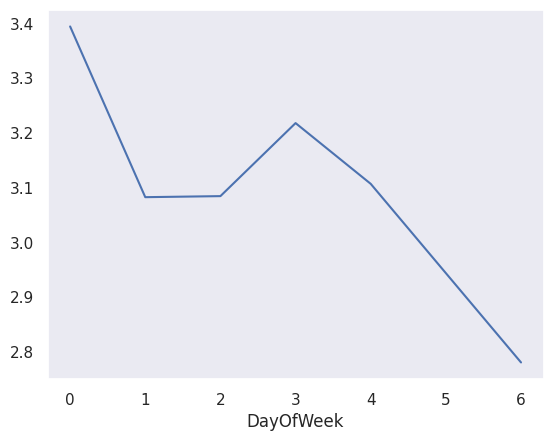

In [32]:
df.groupby('DayOfWeek')['UnitPrice'].mean().plot();

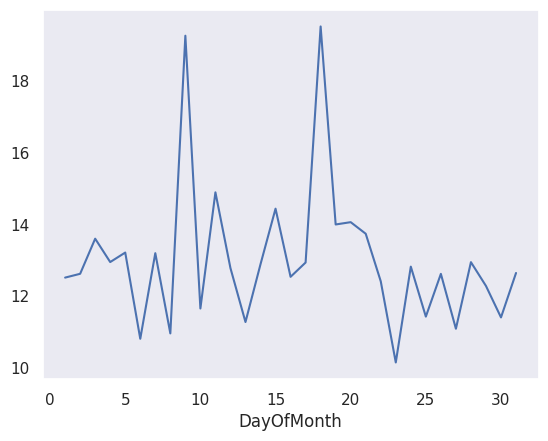

In [33]:
df.groupby('DayOfMonth')['Quantity'].mean().plot();

In [34]:
#Descriptions
df['Description'].nunique()

3877

In [35]:
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64

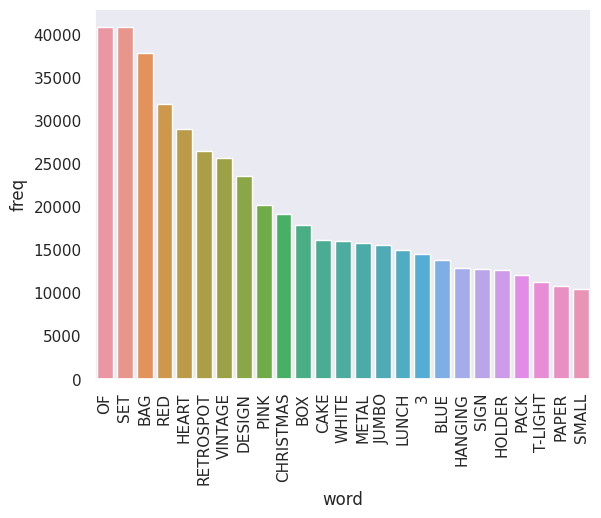

In [36]:
words = {}
descriptions = df['Description'].str.split().to_list()
for description in descriptions:
    for word in description:
        if word.upper() in words.keys():
            words[word.upper()] += 1
        else:
            words[word.upper()] = 1
sorted_words = sorted(words.items(), key=lambda item:item[1],reverse=True)
word_count= pd.DataFrame(sorted_words[:25],columns=['word','freq'])
sns.barplot(word_count,x='word',y='freq')
plt.xticks(rotation=90);

<Axes: >

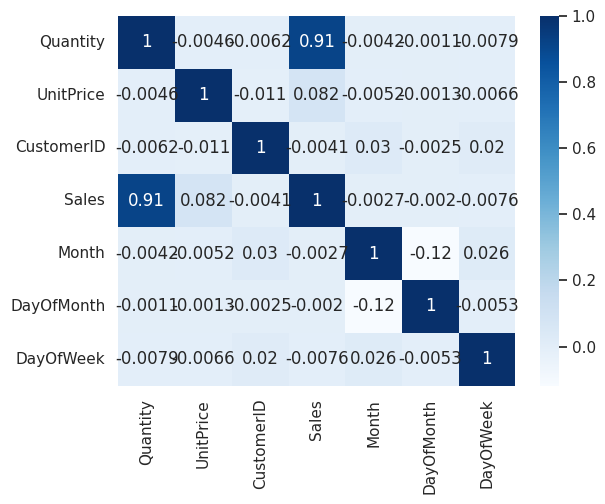

In [37]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='Blues')

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df_ = df.drop(columns=['Description','InvoiceDate','CustomerID','InvoiceNo','Quarter'])
df_ = df_[(df_['Country'].isin(top_countries)) & (df_['StockCode'].isin(top_stock))]
X = df_.drop(columns=['Quantity'])
y = df_['Quantity']
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns,drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [41]:
y

0          6
9         32
21         6
27        24
28        12
          ..
541879     8
541880     4
541898     4
541899     4
541908     3
Name: Quantity, Length: 48261, dtype: int64

In [106]:
X_train.shape, X_test.shape,

((38608, 63), (9653, 63))

In [107]:
y_train.shape, y_test.shape

((38608,), (9653,))

In [108]:
X_scaled.shape

(48261, 63)

In [113]:
import torch
from torch import nn

class Data(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y.values)
        
    def __len__(self): return len(self.X)
    
    def __getitem__(self,i): return (self.X[i], self.y[i])
    

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(63,150),
            nn.Tanh(),
            nn.Linear(150,40),
            nn.ReLU(),
#             nn.Linear(40,10),
#             nn.Sigmoid(),
            nn.Linear(40,8),
            nn.ReLU(),
            nn.Linear(8,1),
#             nn.ReLU(),
#             nn.Linear(10,1)
        )
        
    def forward(self, X):
        return self.layer(X)

In [114]:
NN = NeuralNetwork()

In [115]:
train_dataset = Data(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8)

In [116]:
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-3,weight_decay=1e-2)
cost = nn.MSELoss()
past_trainig_loss = 0
epochs = 100
for epoch in range(epochs):
    total_training_loss = 0
    for i, data in enumerate(train_loader,0):
        features,target = data
        features,target = features.float(),target.float()
        target = target.reshape(-1,1)
        optimizer.zero_grad()
        pred = NN.forward(features)
        loss = cost(pred,target)
        total_training_loss += loss.item()
        loss.backward()
        optimizer.step()
    past_trainig_loss = total_training_loss - past_trainig_loss
    print(f'-[{str(epoch+1).zfill(2)}]  loss = {total_training_loss} | diffrecence = {past_trainig_loss}')
    past_trainig_loss = total_training_loss

-[01]  loss = 5732297.949578285 | diffrecence = 5732297.949578285
-[02]  loss = 2695216.5749418736 | diffrecence = -3037081.3746364117
-[03]  loss = 1707150.5020209253 | diffrecence = -988066.0729209483
-[04]  loss = 1282817.8463588506 | diffrecence = -424332.6556620747
-[05]  loss = 974068.4463662952 | diffrecence = -308749.3999925554
-[06]  loss = 848086.1927448511 | diffrecence = -125982.2536214441
-[07]  loss = 699897.8014672399 | diffrecence = -148188.39127761126
-[08]  loss = 752601.3852573484 | diffrecence = 52703.58379010856
-[09]  loss = 570294.5452752411 | diffrecence = -182306.83998210728
-[10]  loss = 400192.30971446633 | diffrecence = -170102.2355607748
-[11]  loss = 718016.1217642426 | diffrecence = 317823.8120497763
-[12]  loss = 577373.4552757889 | diffrecence = -140642.66648845375
-[13]  loss = 414771.88863299787 | diffrecence = -162601.56664279103
-[14]  loss = 319975.26784246415 | diffrecence = -94796.62079053372
-[15]  loss = 389711.0621264875 | diffrecence = 69735.

In [117]:
preds = NN.forward(torch.from_numpy(X_test).float())
preds = preds.detach().numpy().reshape(-1,)
result = pd.DataFrame(
    {
        'Actual':y_test,
        'Prediction':np.round(preds).astype(int)

    }
)
result.head(10)

,Actual,Prediction
140447,12,11
408608,1,2
446433,2,2
345295,2,2
392542,3,3
506557,4,4
306161,1,2
189286,12,11
424444,36,38
1428,30,28


In [118]:
from sklearn.metrics import r2_score

r2_score(y_test,preds)

0.9472058514605644